In [8]:
from interClusLib.IntervalData import IntervalData
from interClusLib.metric import *
from interClusLib.clustering import IntervalKMeans, IntervalAgglomerativeClustering
from interClusLib.visualization.HeatMap import HeatMap
from interClusLib.visualization import Interval2d, Interval3d ,IntervalParallelCoordinates ,IntervalRadarChart, Dendrogram

random_data = IntervalData.make_interval_blobs(n_samples=10000, n_clusters=3, n_dims = 4)
print("\n Random Interval Data:")
print(random_data.data)
random_data.summary()


 Random Interval Data:
      Feature_1_lower  Feature_1_upper  Feature_2_lower  Feature_2_upper  \
0           -0.643045         1.605277        -1.396763         0.376647   
1            0.573537         1.529906        -1.724274         1.310367   
2           -1.463164        -0.042865         8.145988        10.084592   
3           -0.754504        -0.281986         5.493446         7.144798   
4           -0.145673         1.072036        -2.642074        -0.754079   
...               ...              ...              ...              ...   
9995       -12.124883        -8.661748        -2.213262        -1.512037   
9996       -11.429507        -9.635590         1.438272         2.010724   
9997        -1.139117         1.081066        -1.310892         1.659870   
9998        -1.937356         0.442437         7.889650         8.195658   
9999        -1.418856         0.819103         7.342969         7.677628   

      Feature_3_lower  Feature_3_upper  Feature_4_lower  Featur

In [9]:

hmodel = IntervalAgglomerativeClustering(n_clusters=3, linkage='ward')
hmodel.fit(random_data.get_intervals())

print(hmodel.labels_)

dendrogram_data = hmodel.get_dendrogram_data()

print(dendrogram_data)

# 绘制基本树形图

[1 1 0 ... 1 0 0]
{'linkage_matrix': array([[3.33800000e+03, 5.32700000e+03, 3.25872055e-01, 2.00000000e+00],
       [4.93000000e+03, 7.90900000e+03, 3.53826258e-01, 2.00000000e+00],
       [8.94400000e+03, 9.38200000e+03, 3.56947158e-01, 2.00000000e+00],
       ...,
       [1.99900000e+04, 1.99920000e+04, 7.89155103e+01, 3.33300000e+03],
       [1.99940000e+04, 1.99950000e+04, 8.34422571e+02, 6.66700000e+03],
       [1.99960000e+04, 1.99970000e+04, 1.30515729e+03, 1.00000000e+04]]), 'labels': array([1, 1, 0, ..., 1, 0, 0], dtype=int32), 'n_leaves': 10000}


Requested clusters: 5, Actual clusters: 5


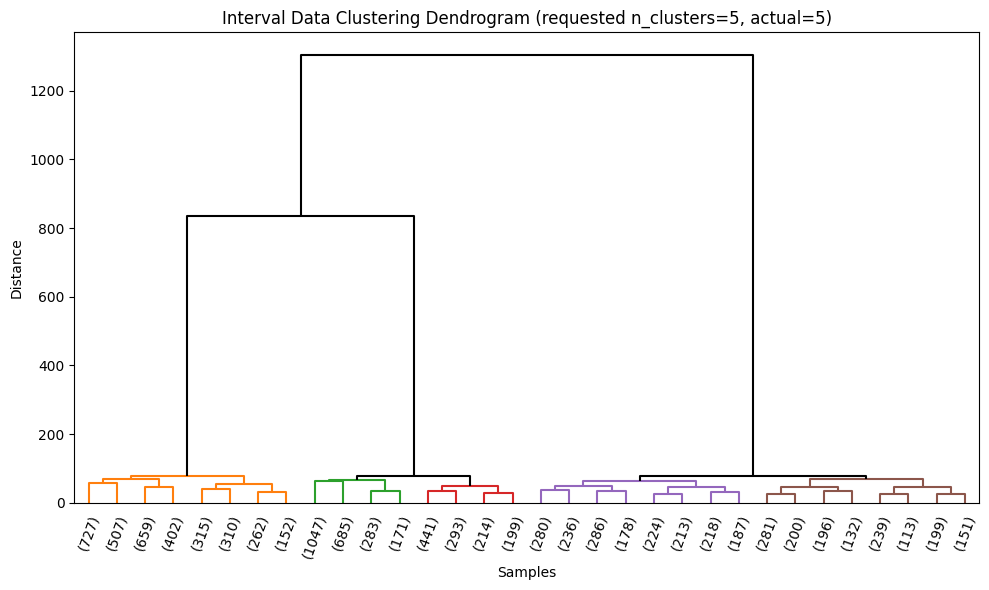

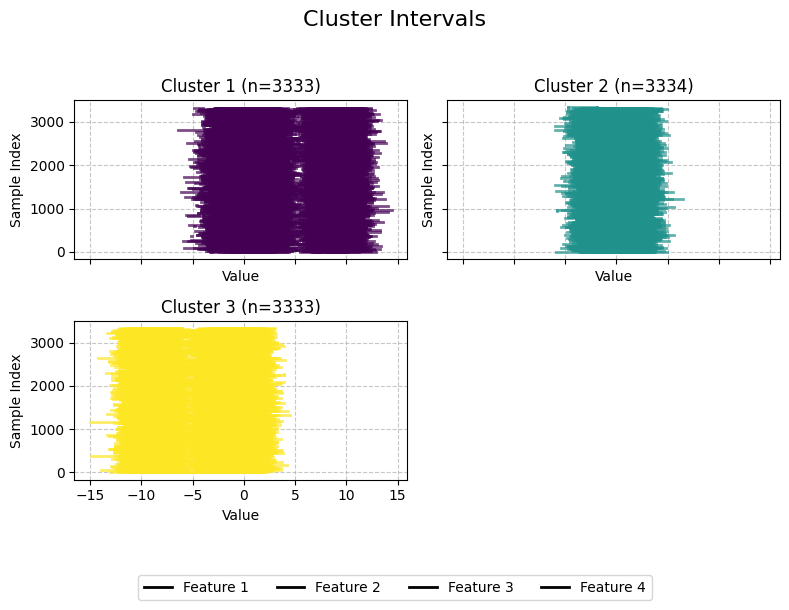

In [10]:
fig, ax, dendro_output = Dendrogram.visualize(
    dendrogram_data=dendrogram_data,
    p=4,
    n_clusters=5,
    title="Interval Data Clustering Dendrogram",
    show_distances= False,
    count_sort= 'descending',
    leaf_rotation=70.,
    truncate_mode='level',
    orientation='top',
    show_leaf_counts=True,
    figsize=(10,6)
)

fig, ax = Dendrogram.visualize_intervals(intervals = random_data.get_intervals() , labels = hmodel.labels_)

(<Figure size 1200x800 with 1 Axes>,
 <Axes: title={'center': 'Parallel Coordinates'}>)

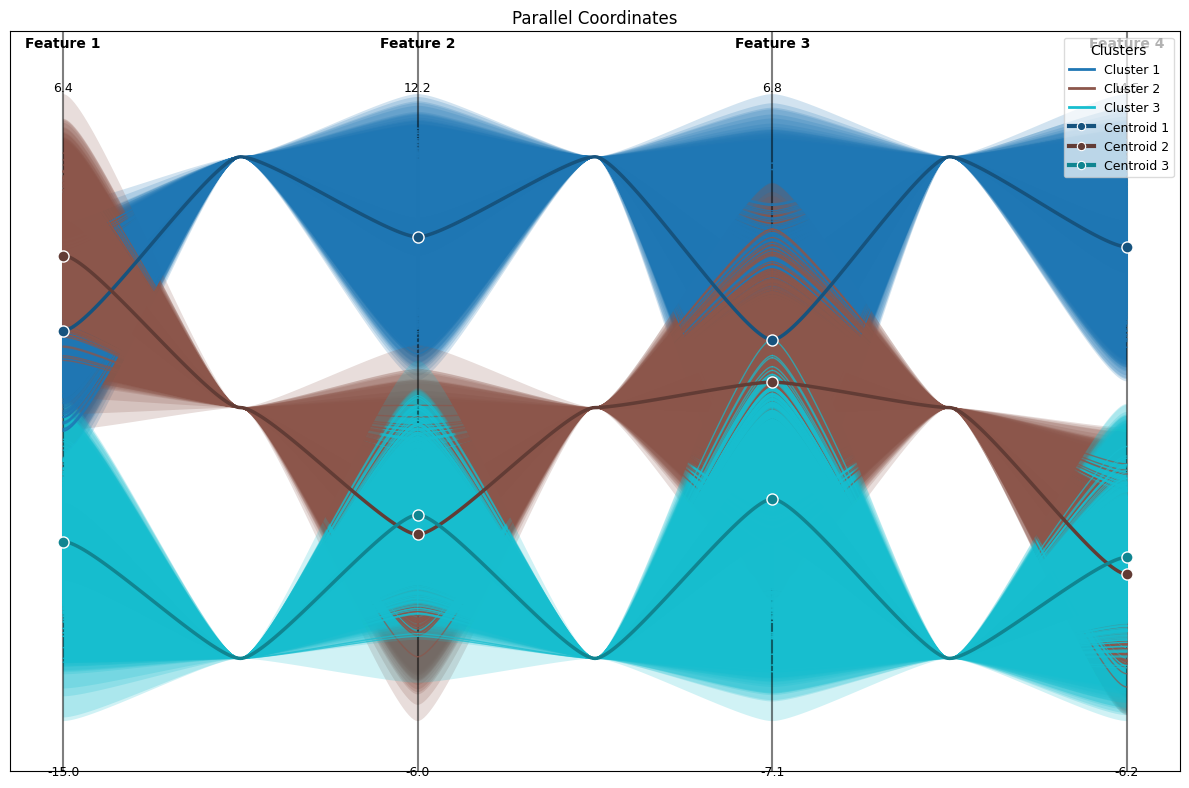

In [11]:

IntervalParallelCoordinates.visualize(intervals = random_data.get_intervals(), 
                                      feature_names= None, 
                                      centroids= hmodel.centroids_,
                                      labels=hmodel.labels_,
                                      alpha=1/6,
                                      beta = 1,
                                      use_bundling= True)


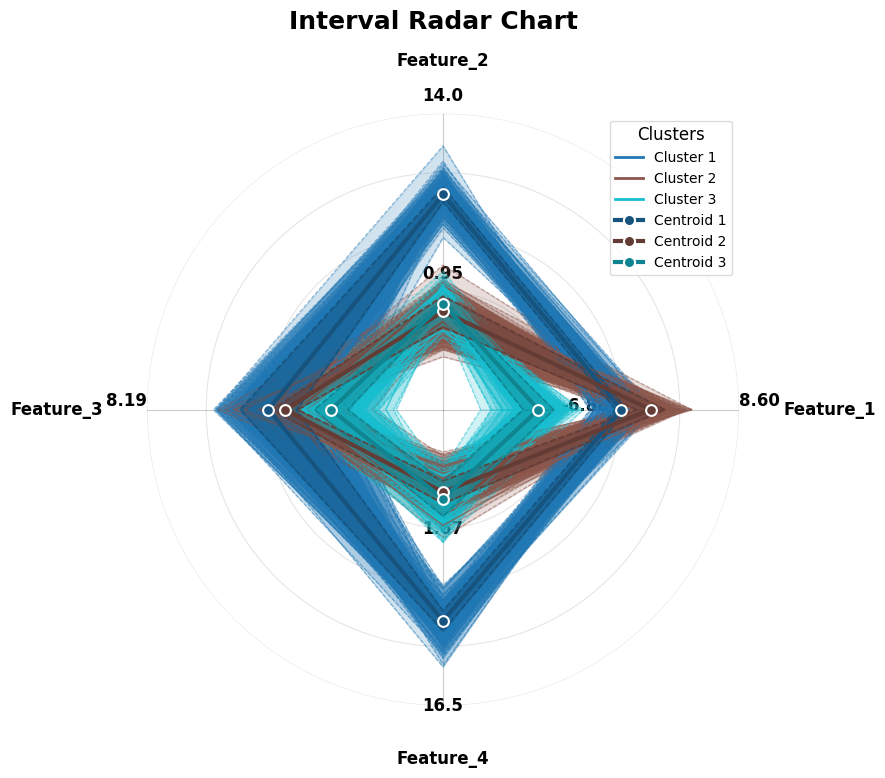

In [12]:
fig, ax = IntervalRadarChart.visualize(
    intervals=random_data.get_intervals(), 
    centroids=hmodel.centroids_,
    labels=hmodel.labels_,
    title="Interval Radar Chart",
    max_samples_per_cluster=50,
)

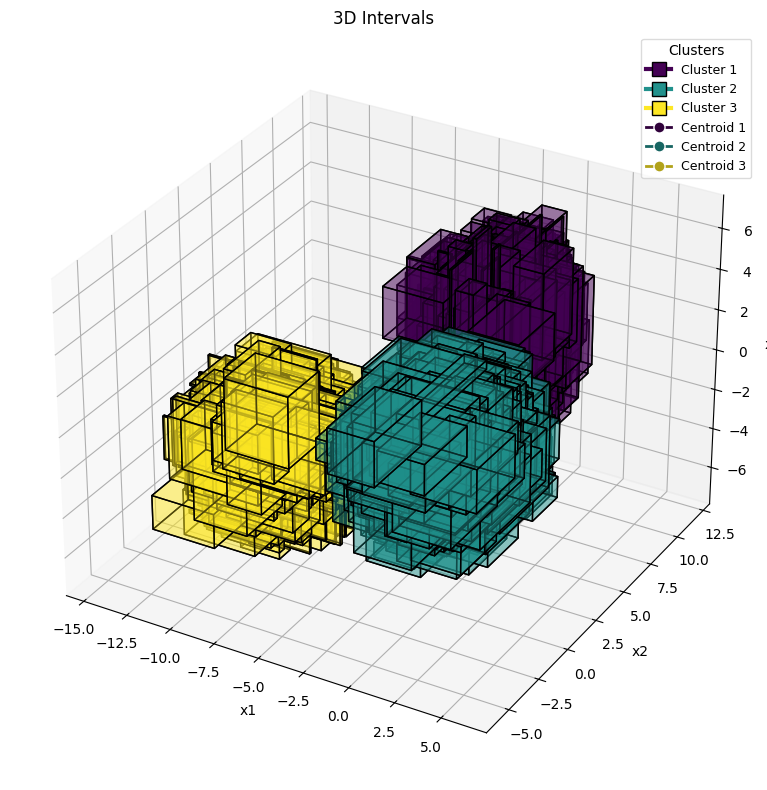

In [13]:
fig, ax = Interval3d.visualize(intervals = random_data.get_intervals(), centroids= hmodel.centroids_, labels = hmodel.labels_)

In [14]:
hmodel.compute_metrics_for_k_range(intervals=random_data.get_intervals())

Computing new linkage matrix...


TypeError: 'NoneType' object is not callable